In [1]:
import h5py
import ROOT

import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

from tqdm import tqdm
from itertools import repeat

ROOT.gROOT.ProcessLine('.include /usr/local/Delphes-3.4.2/')
ROOT.gROOT.ProcessLine('.include /usr/local/Delphes-3.4.2/external/')
ROOT.gInterpreter.Declare('#include "/usr/local/Delphes-3.4.2/classes/DelphesClasses.h"')
# ROOT.gInterpreter.Declare('#include "/usr/local/Delphes-3.4.2/external/ExRootAnalysis/ExRootTreeReader.h"')
# ROOT.gInterpreter.Declare('#include "/usr/local/Delphes-3.4.2/external/ExRootAnalysis/ExRootConfReader.h"')
# ROOT.gInterpreter.Declare('#include "/usr/local/Delphes-3.4.2/external/ExRootAnalysis/ExRootTask.h"')
ROOT.gSystem.Load("/usr/local/Delphes-3.4.2/install/lib/libDelphes")

MAX_JETS = 300
N_CORES = 8

Welcome to JupyROOT 6.20/08


In [2]:
def Mjets(*arg):
    # arg: list of jets
    # return: invariant mass of jets
    e_tot, px_tot, py_tot, pz_tot = 0, 0, 0, 0
    
    for jet in arg:
        pt, eta, phi, m = jet[0], jet[1], jet[2], jet[3]
        
        px, py, pz = pt*np.cos(phi), pt*np.sin(phi), pt*np.sinh(eta)
        e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
        
        px_tot += px
        py_tot += py
        pz_tot += pz
        e_tot += e
    
    return np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)

In [3]:
def get_mass_and_deta(tree):
    # get invariant mass and delta eta of two leading jets
    # 1. number of photons >= 2
    # 2. number of jets >= 2
    # 3. invariant mass of two leading photons in [120, 130] GeV

    mass, deta = [], []
    for event_id, event in tqdm(enumerate(tree)):
        # if event_id == 10:
        #     break

        if event.Photon_size < 2:
            continue

        if event.Jet_size < 2:
            continue

        # compute invariant mass of two leading photons
        photons = [[event.Photon[i].PT, event.Photon[i].Eta, event.Photon[i].Phi, 0] for i in range(2)]
        maa = Mjets(*photons)
        if maa < 120 or maa > 130:
            continue

        jets = [[event.Jet[i].PT, event.Jet[i].Eta, event.Jet[i].Phi, event.Jet[i].Mass] for i in range(2)]
        mjj = Mjets(*jets)
        mass.append(mjj)

        detajj = np.abs(jets[0][1] - jets[1][1])
        deta.append(detajj)
    
    return mass, deta

In [4]:
root_file = './GGF_Higgs/Events/run_02/tag_1_delphes_events.root'
f = ROOT.TFile(root_file)
tree = f.Get("Delphes")

# 1. number of photons >= 2
# 2. number of jets >= 2
# 3. invariant mass of two leading photons in [120, 130] GeV
counts = [0, 0, 0]
mjjs = []
detajjs = []    
for event_id, event in tqdm(enumerate(tree)):
    
    # if event_id == 10:
    #     break

    if event.Photon_size < 2:
        continue
    counts[0] += 1

    if event.Jet_size < 2:
        continue
    counts[1] += 1

    # compute invariant mass of two leading photons
    photons = [[event.Photon[i].PT, event.Photon[i].Eta, event.Photon[i].Phi, 0] for i in range(2)]
    maa = Mjets(*photons)
    if maa < 120 or maa > 130:
        continue
    counts[2] += 1

print('Number of events:', counts)

100000it [01:30, 1109.02it/s]

Number of events: [48286, 9302, 8864]



Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class Track read from file ./GGF_Higgs/Events/run_02/tag_1_delphes_events.root
   has the same version (=3) as the active class but a different checksum.
   You should update the version to ClassDef(Track,4).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 3 of class 'Track' is missing from 
the on-file layout version 3:
   float C; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 3 of class 'Track' is missing from 
the on-file layout version 3:
   float Mass; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 3 of class 'Track' is missing from 
the on-file layout version 3:
   float EtaOuter; //
Warning in <TStreamerInfo::CompareContent>: The following data me

In [5]:
root_file = './VBF_Higgs/Events/run_02/tag_1_delphes_events.root'
f = ROOT.TFile(root_file)
tree = f.Get("Delphes")

# 1. number of photons >= 2
# 2. number of jets >= 2
# 3. invariant mass of two leading photons in [120, 130] GeV
counts = [0, 0, 0]
for event_id, event in tqdm(enumerate(tree)):
    
    # if event_id == 10:
    #     break

    if event.Photon_size < 2:
        continue
    counts[0] += 1

    if event.Jet_size < 2:
        continue
    counts[1] += 1

    # compute invariant mass of two leading photons
    photons = [[event.Photon[i].PT, event.Photon[i].Eta, event.Photon[i].Phi, 0] for i in range(2)]
    maa = Mjets(*photons)
    if maa < 120 or maa > 130:
        continue
    counts[2] += 1

    

print('Number of events:', counts)

0it [00:00, ?it/s]

100000it [01:42, 978.06it/s]

Number of events: [53087, 42860, 40694]



Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo for version 2 of class GenParticle read from the file ./VBF_Higgs/Events/run_02/tag_1_delphes_events.root
   has a different checksum than the previously loaded StreamerInfo.
   Reading objects of type GenParticle from the file ./VBF_Higgs/Events/run_02/tag_1_delphes_events.root 
   (and potentially other files) might not work correctly.
   Most likely the version number of the class was not properly
   updated [See ClassDef(GenParticle,2)].
Warning in <TStreamerInfo::CompareContent>: The following data member of
the on-file layout version 2 of class 'GenParticle' differs from 
the in-memory layout version 2:
   float T; //number
vs
   float CtgTheta; //number
Warning in <TStreamerInfo::CompareContent>: The following data member of
the on-file layout version 2 of class 'GenParticle' differs from 
the in-memory layout version 2:
   float X; //number
vs
   float D0; //number
Warning in <TStreamerInfo::CompareContent>: The foll

In [9]:
root_file = './GGF_Higgs/Events/run_02/tag_1_delphes_events.root'
f = ROOT.TFile(root_file)
tree = f.Get("Delphes")
mjj_GGF, deta_GGF = get_mass_and_deta(tree)

root_file = './VBF_Higgs/Events/run_02/tag_1_delphes_events.root'
f = ROOT.TFile(root_file)
tree = f.Get("Delphes")
mjj_VBF, deta_VBF = get_mass_and_deta(tree)

100000it [01:32, 1080.77it/s]
100000it [01:52, 890.98it/s]


In [10]:
print('GGF:', len(mjj_GGF), len(deta_GGF))
print('VBF:', len(mjj_VBF), len(deta_VBF))

GGF: 8864 8864
VBF: 40694 40694


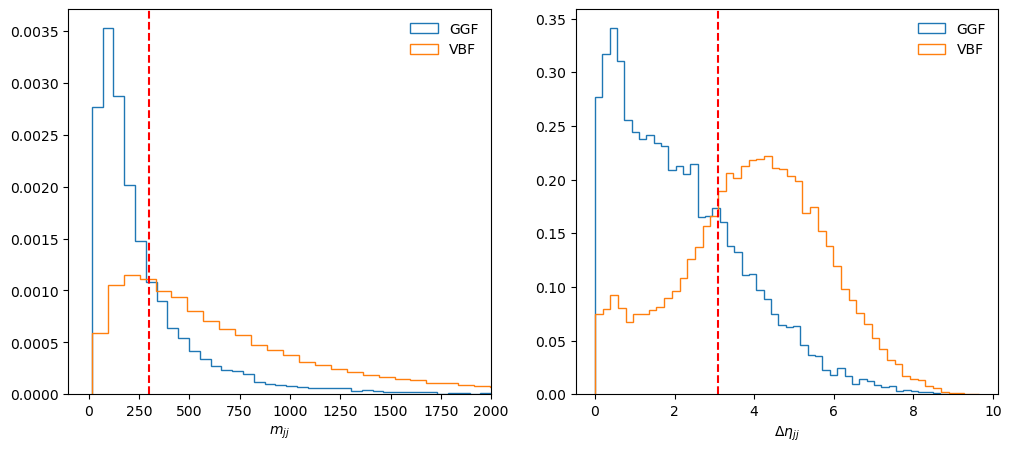

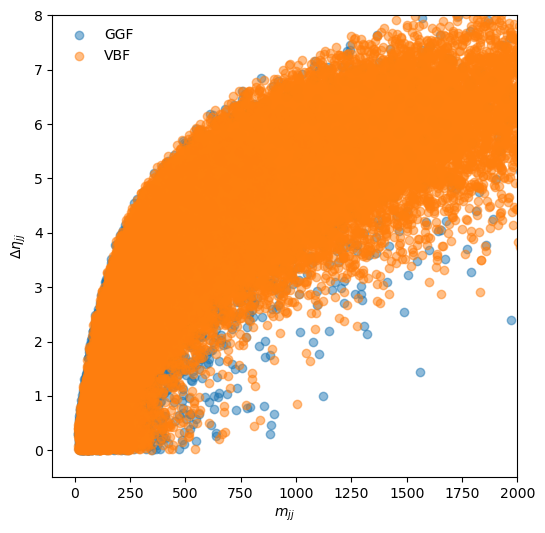

In [14]:
# only plot the first 1000 events
# mjj_GGF = mjj_GGF[:1000]
# deta_GGF = deta_GGF[:1000]
# mjj_VBF = mjj_VBF[:1000]
# deta_VBF = deta_VBF[:1000]

cuts = {'mjj': 300, 'deta': 3.1}

# plot mjj and detajj distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(mjj_GGF, bins=100, histtype='step', label='GGF', density=True)
ax[0].hist(mjj_VBF, bins=100, histtype='step', label='VBF', density=True)
ax[0].axvline(cuts['mjj'], color='r', linestyle='--')
ax[0].set_xlabel('$m_{jj}$')
ax[0].set_xlim(-100, 2000)
ax[0].legend(frameon=False)


ax[1].hist(deta_GGF, bins=50, histtype='step', label='GGF', density=True)
ax[1].hist(deta_VBF, bins=50, histtype='step', label='VBF', density=True)
ax[1].axvline(cuts['deta'], color='r', linestyle='--')
ax[1].set_xlabel('$\Delta\eta_{jj}$')

ax[1].legend(frameon=False)
plt.show()

# plot mjj and detajj scatter plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(mjj_GGF, deta_GGF, marker='o', alpha=0.5, label='GGF')
ax.scatter(mjj_VBF, deta_VBF, marker='o', alpha=0.5, label='VBF')
ax.set_xlabel('$m_{jj}$')
ax.set_ylabel('$\Delta\eta_{jj}$')
ax.set_xlim(-100, 2000)
ax.set_ylim(-0.5, 8)
ax.legend(frameon=False)
plt.show()

# Basic Information

In [3]:
def get_number_of_constituents(tree):
    # Hidden Valley model selection
    # 1. 2 jets
    # 2. pT > 750 GeV
    # 3. |eta| < 2.0
    # 4. 4300 < Mjj < 5900 GeV
    
    n_consti = [[],[]]

    for event_id, event in tqdm(enumerate(tree)):

        if event.Jet_size < 2:
            continue

        if event.Jet[1].PT < 750:
            continue

        if abs(event.Jet[0].Eta) > 2.0 or abs(event.Jet[1].Eta) > 2.0:
            continue

        jets = [[event.Jet[i].PT, event.Jet[i].Eta, event.Jet[i].Phi, event.Jet[i].Mass] for i in range(2)]
        mjj = Mjets(*jets)

        if mjj < 4300 or mjj > 5900:
            continue

        # Get number of constituents
        constituents = [consti for consti in event.Jet[0].Constituents if consti != 0]
        n_consti[0].append(len(constituents))

        constituents = [consti for consti in event.Jet[1].Constituents if consti != 0]
        n_consti[1].append(len(constituents))

    return n_consti

In [4]:
root_file = '../../Software/pythia8307/HVmodel/test_100k.root'
f = ROOT.TFile(root_file)
tree_s = f.Get("Delphes")

n_consti_s = get_number_of_constituents(tree_s)

100000it [03:15, 511.12it/s]


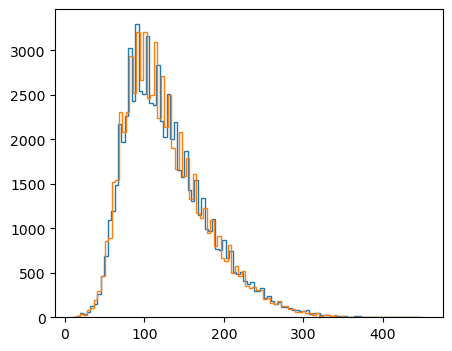

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.hist(n_consti_s[0], bins=100, histtype='step')
ax.hist(n_consti_s[1], bins=100, histtype='step')
plt.show()

# From .root to .h5

In [3]:
# HDF5
def create_dataset(f, nevent, MAX_JETS):

    f.create_dataset('J1/MASK', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='|b1')
    f.create_dataset('J1/pt', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')
    f.create_dataset('J1/eta', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')
    f.create_dataset('J1/phi', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')

    f.create_dataset('J2/MASK', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='|b1')
    f.create_dataset('J2/pt', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')
    f.create_dataset('J2/eta', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')
    f.create_dataset('J2/phi', (nevent, MAX_JETS), maxshape=(None, MAX_JETS), dtype='<f4')

    f.create_dataset('EVENT/Mjj', (nevent,), maxshape=(None,), dtype='<f4')
    f.create_dataset('EVENT/signal', (nevent,), maxshape=(None,), dtype='<i8')


def write_dataset(file, data: list):
    nevent = len(data)
    
    for key in data[0].keys():
        # Resize
        shape = list(file[key].shape)
        shape[0] = nevent
        file[key].resize(shape)
        # Write
        value = np.array([data_dict[key] for data_dict in data])
        file[key][:] = value


def get_dataset_keys(f):
    keys = []
    f.visit(lambda key : keys.append(key) if isinstance(f[key], h5py.Dataset) else None)
    return keys


In [4]:
def get_pt_eta_phi(constituents):
    pts = np.array([consti.PT if hasattr(consti, 'PT') else consti.ET for consti in constituents])
    etas = np.array([consti.Eta for consti in constituents])
    phis = np.array([consti.Phi for consti in constituents])
    return pts, etas, phis


def select_event(root_path, sample_type, start, end):
    # Hidden Valley model selection
    # 1. 2 jets
    # 2. pT > 750 GeV
    # 3. |eta| < 2.0

    f = ROOT.TFile(root_path)
    tree = f.Get("Delphes")

    data_list = []
    for i in tqdm(range(start, end)):
        tree.GetEntry(i)

        if tree.Jet_size < 2:
            continue

        if tree.Jet[1].PT < 750:
            continue

        if abs(tree.Jet[0].Eta) > 2.0 or abs(tree.Jet[1].Eta) > 2.0:
            continue

        jets = [[tree.Jet[i].PT, tree.Jet[i].Eta, tree.Jet[i].Phi, tree.Jet[i].Mass] for i in range(2)]
        mjj = Mjets(*jets)

        # get jet constituents
        constituents = [consti for consti in tree.Jet[0].Constituents if consti != 0]
        n_consti_1 = len(constituents)
        PT1, Eta1, Phi1 = get_pt_eta_phi(constituents)

        constituents = [consti for consti in tree.Jet[1].Constituents if consti != 0]
        n_consti_2 = len(constituents)
        PT2, Eta2, Phi2 = get_pt_eta_phi(constituents)

        if n_consti_1 < 5 or n_consti_2 < 5:
            continue

        # 準備寫入資料
        data_dict = {
            'J1/MASK': np.arange(MAX_JETS) < n_consti_1,
            'J1/pt': PT1[:MAX_JETS] if n_consti_1 > MAX_JETS else np.pad(PT1, (0, MAX_JETS-n_consti_1)),
            'J1/eta': Eta1[:MAX_JETS] if n_consti_1 > MAX_JETS else np.pad(Eta1, (0, MAX_JETS-n_consti_1)),
            'J1/phi': Phi1[:MAX_JETS] if n_consti_1 > MAX_JETS else np.pad(Phi1, (0, MAX_JETS-n_consti_1)),

            'J2/MASK': np.arange(MAX_JETS) < n_consti_2,
            'J2/pt': PT2[:MAX_JETS] if n_consti_2 > MAX_JETS else np.pad(PT2, (0, MAX_JETS-n_consti_2)),
            'J2/eta': Eta2[:MAX_JETS] if n_consti_2 > MAX_JETS else np.pad(Eta2, (0, MAX_JETS-n_consti_2)),
            'J2/phi': Phi2[:MAX_JETS] if n_consti_2 > MAX_JETS else np.pad(Phi2, (0, MAX_JETS-n_consti_2)),

            'EVENT/Mjj': mjj,
            'EVENT/signal': sample_type,
        }
        data_list.append(data_dict)

    return data_list


def from_root_to_h5(root_path, output_path, sample_type):
    # Select events and save the jets information to h5 file

    # Get number of events
    f = ROOT.TFile(root_path)
    nevent = f.Get("Delphes").GetEntries()
    print(f'Number of events: {nevent}')

    # Multi-core processing
    print(f'Number of cores: {N_CORES}')
    start = [nevent // N_CORES * i for i in range(N_CORES)]
    end = [nevent // N_CORES * (i+1) for i in range(N_CORES)]
    end[-1] = nevent

    with mp.Pool(processes=N_CORES) as pool:
        results = pool.starmap(select_event, zip(repeat(root_path), repeat(sample_type), start, end))
    data_list = [data_dict for result_list in results for data_dict in result_list]

    # write to h5 file
    with h5py.File(output_path, 'w') as f_out:
        create_dataset(f_out, nevent, MAX_JETS)
        write_dataset(f_out, data_list)

In [6]:
root_file = '../../Software/pythia8307/HVmodel/test.root'
output_path = './HVmodel/data/test-new.h5'
sample_type = 1

from_root_to_h5(root_file, output_path, sample_type)

Number of events: 10000
Number of cores: 8


100%|██████████| 1250/1250 [00:03<00:00, 366.93it/s]
